In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/BankChurners.csv')

In [4]:
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991


In [5]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)

In [6]:
df.drop(columns='CLIENTNUM',inplace=True)

In [7]:
df['Avg_Transaction_Value'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']

In [8]:
df.drop(columns=['Total_Trans_Amt','Total_Trans_Ct'],inplace=True)

In [9]:
df.drop(columns=['Months_on_book','Total_Revolving_Bal','Avg_Open_To_Buy'],inplace=True)

In [11]:
df['Education_Level'].replace({'Unknown':np.nan,'Post-Graduate':'Advanced_Degree','Doctorate':'Advanced_Degree'},inplace=True)
df['Marital_Status'].replace({'Unknown':np.nan},inplace=True)
df['Income_Category'].replace({'Unknown':np.nan},inplace=True)

In [12]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.9/705.9 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 13.5 MB/s eta 0:00:00


In [13]:
import mlflow

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

In [15]:
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Transaction_Value
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,1.335,1.625,0.061,27.238095


In [16]:
!pip install mlflow dagshub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.3/261.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.3 MB/s eta 0:00:00


In [17]:
import dagshub
dagshub.init(repo_owner='Ranjan113', repo_name='credit-card-churn', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=27694820-b75f-4cae-834c-589c5cfb900b&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=d29e4aa37bd48d6e03365944df566d6fb4a29458921dae6dc4d47de56c3535bf




Accessing as Ranjan113

Initialized MLflow to track repo "Ranjan113/credit-card-churn"

Repository Ranjan113/credit-card-churn initialized!

In [18]:
mlflow.set_tracking_uri("https://dagshub.com/Ranjan113/credit-card-churn.mlflow")

In [32]:
mlflow.set_experiment("Exp. 1 - Trying different Imputing techniques")

<Experiment: artifact_location='mlflow-artifacts:/bcf5a164c9594b0fb6dcf65b3e52d6a9', creation_time=1757054281685, experiment_id='2', last_update_time=1757054281685, lifecycle_stage='active', name='Exp. 1 - Trying different Imputing techniques', tags={}>

In [33]:
print("Tracking URI:", mlflow.get_tracking_uri())

Tracking URI: https://dagshub.com/Ranjan113/credit-card-churn.mlflow


In [21]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [23]:
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Transaction_Value
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,1.335,1.625,0.061,27.238095


In [ ]:
# gender_pipe = Pipeline(steps=[
#     ('encoding',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False))
# ])

# education_pipe = Pipeline(steps=[
#     ('impute',SimpleImputer(strategy='most_frequent',add_indicator=True)),
#     ('encoding',OrdinalEncoder(categories=[['Uneducated','High School','College','Graduate','Advanced_Degree']]))
# ])

# marital_income_pipe = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent',add_indicator=True)),
#     ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False))
# ])

In [ ]:
# preprocessor = ColumnTransformer(transformers=[
#     ('gender',gender_pipe,['Gender']),
#     ('education',education_pipe,['Education_Level']),
#     ('marital_income',marital_income_pipe,['Marital_Status','Income_Category']),
#     ('encoding_card',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),['Card_Category']),
#     ('power_transform',PowerTransformer(),['Customer_Age','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Avg_Transaction_Value'])


# ],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False)

# preprocessor.set_output(transform="pandas")

In [24]:
simple_imputer = ColumnTransformer(transformers=[
    ('mode_imputing',SimpleImputer(strategy='most_frequent',add_indicator=True),['Education_Level','Marital_Status','Income_Category'])
],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

encode = ColumnTransformer(transformers=[
    ('ordinal_encoding',OrdinalEncoder(categories=[['Uneducated','High School','College','Graduate','Advanced_Degree']]),['Education_Level']),
    ('nominal_encoding',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),['Gender','Marital_Status','Income_Category','Card_Category'])
],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

power_transform = ColumnTransformer(transformers=[
    ('power_transform',PowerTransformer(),['Customer_Age','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Avg_Transaction_Value'])
],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


In [25]:
preprocessor_pipeline = Pipeline(steps=[
    ("simple_imputer",simple_imputer),
    ('encoding',encode),
    ('pt',power_transform)
])

preprocessor_pipeline.set_output(transform="pandas")

Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('mode_imputing',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='most_frequent'),
                                                  ['Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category'])],
                                   verbose_feature_names_out=False)),
                ('encoding',
                 ColumnTransformer(force_int_remainder_co...
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('power_transform',
                                                  PowerTransformer(),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio',
                                                   'Avg_Transaction_Value'])],
                                   verbose_feature_names_out=False))])

In [ ]:
# preprocessor_pipeline.get_params()

In [26]:
X_train_trans = preprocessor_pipeline.fit_transform(X_train)
X_test_trans = preprocessor_pipeline.transform(X_test)

X_train_trans

attrition_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
y_train_le = y_train['Attrition_Flag'].map(attrition_mapping)
y_test_le = y_test['Attrition_Flag'].map(attrition_mapping)

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_trans,y_train_le)

LogisticRegression()

In [28]:
y_pred_train = lr.predict(X_train_trans)
y_pred_test = lr.predict(X_test_trans)

y_train_proba = lr.predict_proba(X_train_trans)[:,1]
y_test_proba = lr.predict_proba(X_test_trans)[:,1]

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

=== Train Performance ===
Accuracy: 0.8824836439945686
Precision: 0.7423398328690808
Recall: 0.41
F1 Score: 0.5282457879088206
ROC-AUC: 0.851439720403108

=== Test Performance ===
Accuracy: 0.8795656465942744
Precision: 0.7577639751552795
Recall: 0.3730886850152905
F1 Score: 0.5
ROC-AUC: 0.8331596387873421




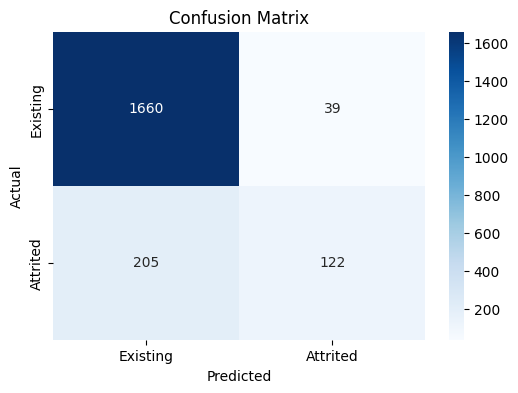

In [30]:
print("=== Train Performance ===")
print("Accuracy:", accuracy_score(y_train_le, y_pred_train))
print("Precision:", precision_score(y_train_le, y_pred_train))
print("Recall:", recall_score(y_train_le, y_pred_train))
print("F1 Score:", f1_score(y_train_le, y_pred_train))
print("ROC-AUC:", roc_auc_score(y_train_le, y_train_proba))

print("\n=== Test Performance ===")
print("Accuracy:", accuracy_score(y_test_le, y_pred_test))
print("Precision:", precision_score(y_test_le, y_pred_test))
print("Recall:", recall_score(y_test_le, y_pred_test))
print("F1 Score:", f1_score(y_test_le, y_pred_test))
print("ROC-AUC:", roc_auc_score(y_test_le, y_test_proba))

print()
print()

cm = confusion_matrix(y_test_le, y_pred_test)

labels = ['Existing', 'Attrited']
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
# log experiment

with mlflow.start_run(run_name="Mode_Impute+Missing_Indicator"):

    mlflow.log_param("experiment_type","Mode_Impute+Missing_Indicator")


    mlflow.log_params(lr.get_params())

    mlflow.log_metric("train_accuracy", accuracy_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_precision", precision_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_recall", recall_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_f1", f1_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_roc_auc", roc_auc_score(y_train_le, y_train_proba))

    mlflow.log_metric("test_accuracy", accuracy_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_precision", precision_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_recall", recall_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_f1", f1_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_roc_auc", roc_auc_score(y_test_le, y_test_proba))

    cm = confusion_matrix(y_test_le, y_pred_test)
    labels = ['Existing', 'Attrited']

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    cm_path = "confusion_matrix.png"
    plt.savefig(cm_path)
    plt.close()

    mlflow.log_artifact(cm_path)

🏃 View run Mode_Impute+Missing_Indicator at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/2/runs/00e301f3ef0d4e57a78f81d41a6f4d0a
🧪 View experiment at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/2


In [43]:
temp_df = df.copy().dropna()

In [44]:
df.shape

(10127, 16)

In [45]:
temp_df.shape

(7081, 16)

In [46]:
X = temp_df.iloc[:,1:]
y = temp_df.iloc[:,:1]

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [48]:
encode = ColumnTransformer(transformers=[
    ('ordinal_encoding',OrdinalEncoder(categories=[['Uneducated','High School','College','Graduate','Advanced_Degree']]),['Education_Level']),
    ('nominal_encoding',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),['Gender','Marital_Status','Income_Category','Card_Category'])
],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

power_transform = ColumnTransformer(transformers=[
    ('power_transform',PowerTransformer(),['Customer_Age','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Avg_Transaction_Value'])
],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

In [49]:
preprocessor_pipeline = Pipeline(steps=[
    ('encoding',encode),
    ('pt',power_transform)
])

preprocessor_pipeline.set_output(transform="pandas")

Pipeline(steps=[('encoding',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('ordinal_encoding',
                                                  OrdinalEncoder(categories=[['Uneducated',
                                                                              'High '
                                                                              'School',
                                                                              'College',
                                                                              'Graduate',
                                                                              'Advanced_Degree']]),
                                                  ['Education_Level']),
                                                 ('nominal_encoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=F...
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('power_transform',
                                                  PowerTransformer(),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio',
                                                   'Avg_Transaction_Value'])],
                                   verbose_feature_names_out=False))])

In [50]:
X_train_trans = preprocessor_pipeline.fit_transform(X_train)
X_test_trans = preprocessor_pipeline.transform(X_test)

X_train_trans

attrition_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
y_train_le = y_train['Attrition_Flag'].map(attrition_mapping)
y_test_le = y_test['Attrition_Flag'].map(attrition_mapping)

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_trans,y_train_le)

LogisticRegression()

In [52]:
y_pred_train = lr.predict(X_train_trans)
y_pred_test = lr.predict(X_test_trans)

y_train_proba = lr.predict_proba(X_train_trans)[:,1]
y_test_proba = lr.predict_proba(X_test_trans)[:,1]

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

=== Train Performance ===
Accuracy: 0.8801200564971752
Precision: 0.745575221238938
Recall: 0.37402885682574916
F1 Score: 0.49815225424981524
ROC-AUC: 0.8408475151713997

=== Test Performance ===
Accuracy: 0.8877911079745943
Precision: 0.7523809523809524
Recall: 0.37264150943396224
F1 Score: 0.49842271293375395
ROC-AUC: 0.8669693885539811




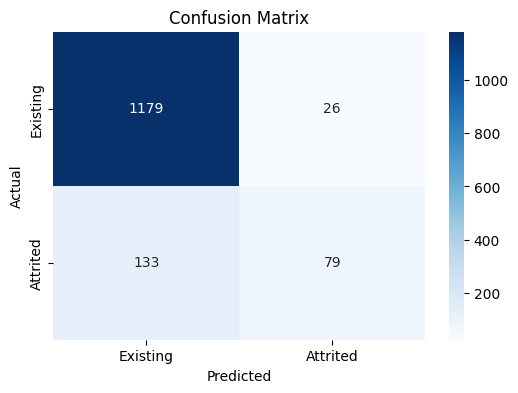

In [55]:
print("=== Train Performance ===")
print("Accuracy:", accuracy_score(y_train_le, y_pred_train))
print("Precision:", precision_score(y_train_le, y_pred_train))
print("Recall:", recall_score(y_train_le, y_pred_train))
print("F1 Score:", f1_score(y_train_le, y_pred_train))
print("ROC-AUC:", roc_auc_score(y_train_le, y_train_proba))

print("\n=== Test Performance ===")
print("Accuracy:", accuracy_score(y_test_le, y_pred_test))
print("Precision:", precision_score(y_test_le, y_pred_test))
print("Recall:", recall_score(y_test_le, y_pred_test))
print("F1 Score:", f1_score(y_test_le, y_pred_test))
print("ROC-AUC:", roc_auc_score(y_test_le, y_test_proba))

print()
print()

cm = confusion_matrix(y_test_le, y_pred_test)

labels = ['Existing', 'Attrited']
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [56]:
# log experiment

with mlflow.start_run(run_name="Drop Missing Values"):

    mlflow.log_param("experiment_type","Drop Missing Values")


    mlflow.log_params(lr.get_params())

    mlflow.log_metric("train_accuracy", accuracy_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_precision", precision_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_recall", recall_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_f1", f1_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_roc_auc", roc_auc_score(y_train_le, y_train_proba))

    mlflow.log_metric("test_accuracy", accuracy_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_precision", precision_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_recall", recall_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_f1", f1_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_roc_auc", roc_auc_score(y_test_le, y_test_proba))

    cm = confusion_matrix(y_test_le, y_pred_test)
    labels = ['Existing', 'Attrited']

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    cm_path = "confusion_matrix.png"
    plt.savefig(cm_path)
    plt.close()

    mlflow.log_artifact(cm_path)

🏃 View run Drop Missing Values at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/2/runs/79e943b8a6974763bf38045fe931c4de
🧪 View experiment at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/2


"Dropping rows with missing values gives the best performance metrics, but results in a **loss of ~30% of the data** (from 10k to ~7k rows). Therefore, we use **mode imputation**, which preserves all data and achieves **comparable results**."